In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [242]:
df=pd.read_csv('/Users/kevinc/Desktop/Data Science/F21DL Data Mining Machine Learning/F21SC CW/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [243]:
df.rename(columns={'Income composition of resources':'HDI'},inplace=True)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,HDI,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [244]:
df=df[['HDI','Adult Mortality']]
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2768 entries, 0 to 2937
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HDI              2768 non-null   float64
 1   Adult Mortality  2768 non-null   float64
dtypes: float64(2)
memory usage: 64.9 KB


/var/folders/kk/hvcgd7qj26n4sxbj_m33lz340000gn/T/ipykernel_9352/392707175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Text(0, 0.5, 'Adult Mortality')

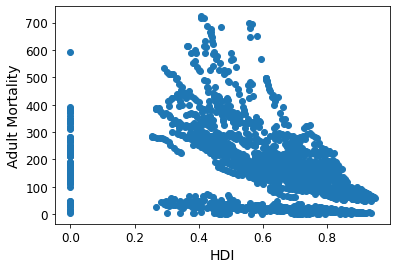

In [245]:
plt.scatter(df['HDI'],df['Adult Mortality'])
plt.xlabel('HDI')
plt.ylabel('Adult Mortality')

In [246]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['HDI','Adult Mortality']])
y_predicted

array([0, 0, 0, ..., 2, 1, 1], dtype=int32)

In [247]:
df['cluster']=y_predicted
df

/var/folders/kk/hvcgd7qj26n4sxbj_m33lz340000gn/T/ipykernel_9352/3711379308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=y_predicted


,HDI,Adult Mortality,cluster
0,0.479,263.0,0
1,0.476,271.0,0
2,0.470,268.0,0
3,0.463,272.0,0
4,0.454,275.0,0
...,...,...,...
2933,0.407,723.0,1
2934,0.418,715.0,1
2935,0.427,73.0,2
2936,0.427,686.0,1


In [248]:
km.cluster_centers_

array([[  0.5844362 , 197.20255183],
       [  0.42178662, 415.97770701],
       [  0.7261425 ,  61.15833333]])

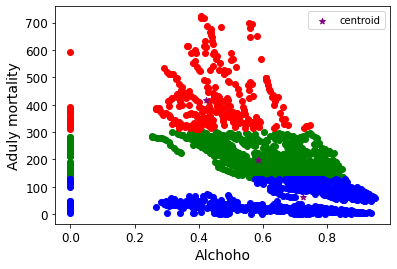

In [249]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['HDI'],df1['Adult Mortality'],color='green')
plt.scatter(df2['HDI'],df2['Adult Mortality'],color='red')
plt.scatter(df3['HDI'],df3['Adult Mortality'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Alchoho')
plt.ylabel('Aduly mortality')
plt.legend()

<h1>Scaling Algorthm</h>

In [250]:
scaler = MinMaxScaler()

scaler.fit(df[['Adult Mortality']])
df['Adult Mortality'] = scaler.transform(df[['Adult Mortality']])

scaler.fit(df[['HDI']])
df['HDI'] = scaler.transform(df[['HDI']])

/var/folders/kk/hvcgd7qj26n4sxbj_m33lz340000gn/T/ipykernel_9352/4072071504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Adult Mortality'] = scaler.transform(df[['Adult Mortality']])
/var/folders/kk/hvcgd7qj26n4sxbj_m33lz340000gn/T/ipykernel_9352/4072071504.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HDI'] = scaler.transform(df[['HDI']])


In [251]:
df.head()

,HDI,Adult Mortality,cluster
0,0.505274,0.362881,0
1,0.502110,0.373961,0
2,0.495781,0.369806,0
3,0.488397,0.375346,0
4,0.478903,0.379501,0


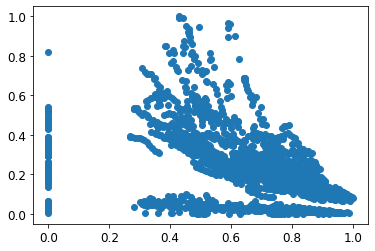

In [252]:
plt.scatter(df.HDI,df['Adult Mortality'])

In [253]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['HDI','Adult Mortality']])
y_predicted

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [254]:
df['cluster']=y_predicted
df.head()

/var/folders/kk/hvcgd7qj26n4sxbj_m33lz340000gn/T/ipykernel_9352/4151433828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=y_predicted


,HDI,Adult Mortality,cluster
0,0.505274,0.362881,0
1,0.502110,0.373961,0
2,0.495781,0.369806,0
3,0.488397,0.375346,0
4,0.478903,0.379501,0


In [255]:
km.cluster_centers_

array([[0.49528712, 0.44114267],
       [0.11608452, 0.19740916],
       [0.77791884, 0.14663116]])

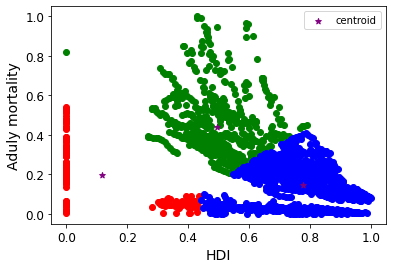

In [256]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['HDI'],df1['Adult Mortality'],color='green')
plt.scatter(df2['HDI'],df2['Adult Mortality'],color='red')
plt.scatter(df3['HDI'],df3['Adult Mortality'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('HDI')
plt.ylabel('Aduly mortality')
plt.legend()

<h1>Cluster  Algorithm</h>

<h2>Elbow method</h>

In [257]:
sse=[]
k_range=range(1,20)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['HDI','Adult Mortality']])
    sse.append(km.inertia_)

In [258]:
sse

[217.29218633914618,
 101.48465632180296,
 72.48988455734096,
 50.65727403834521,
 38.3074407572311,
 28.984420118936686,
 24.7127111137994,
 20.651757737542574,
 18.209917443277266,
 16.255528630900514,
 14.509761369102797,
 13.015785907185716,
 11.926414388536635,
 10.856579550283676,
 10.125498482174024,
 9.335726264880503,
 8.739909519955802,
 8.085220070774877,
 7.680897362424615]

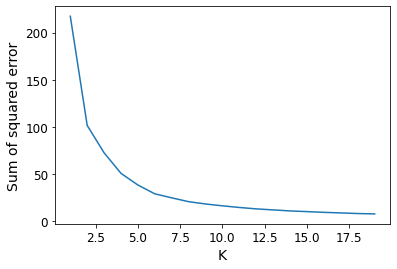

In [259]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [260]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['HDI','Adult Mortality']])
df['cluster']=y_predicted
km.cluster_centers_

/var/folders/kk/hvcgd7qj26n4sxbj_m33lz340000gn/T/ipykernel_9352/2992966442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=y_predicted


array([[0.46850944, 0.48566852],
       [0.84712124, 0.11719656],
       [0.00439522, 0.2640183 ],
       [0.63452457, 0.20545411]])

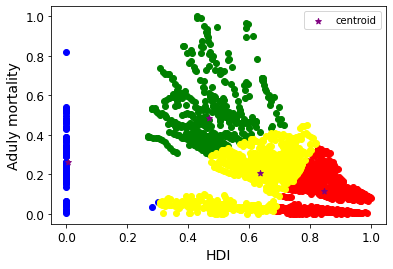

In [261]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

plt.scatter(df1['HDI'],df1['Adult Mortality'],color='green')
plt.scatter(df2['HDI'],df2['Adult Mortality'],color='red')
plt.scatter(df3['HDI'],df3['Adult Mortality'],color='blue')
plt.scatter(df4['HDI'],df4['Adult Mortality'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('HDI')
plt.ylabel('Aduly mortality')
plt.legend()

In [262]:
from sklearn.metrics import silhouette_score


In [263]:
silhouette_score(X, kmeans.labels_)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [264]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

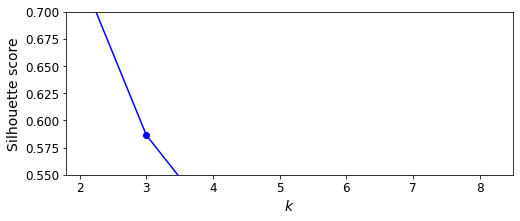

In [265]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

plt.show()

Conclusion - alchohol doesnt have affect on mortality

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [267]:
df=df[['Hepatitis B','Life expectancy ']].dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2937
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hepatitis B       2375 non-null   float64
 1   Life expectancy   2375 non-null   float64
dtypes: float64(2)
memory usage: 55.7 KB


Text(0, 0.5, 'Life expectancy')

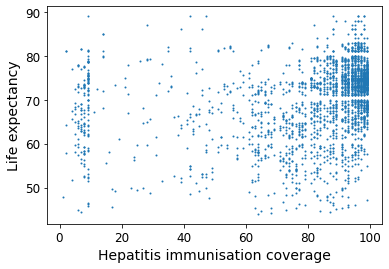

In [268]:
plt.scatter(df['Hepatitis B'], df['Life expectancy '], s=1)
plt.xlabel('Hepatitis immunisation coverage')
plt.ylabel('Life expectancy')

In [269]:
X = np.asarray(df, dtype=np.float32)
X


array([[65. , 65. ],
       [62. , 59.9],
       [64. , 59.9],
       ...,
       [73. , 44.8],
       [76. , 45.3],
       [79. , 46. ]], dtype=float32)

In [270]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [271]:
y_pred

array([2, 2, 2, ..., 2, 2, 4], dtype=int32)

In [272]:
y_pred is kmeans.labels_

True

In [273]:
kmeans.cluster_centers_

array([[94.52627  , 74.96619  ],
       [46.31496  , 66.23622  ],
       [71.36871  , 63.759777 ],
       [ 9.7526245, 67.43263  ],
       [90.139534 , 61.101032 ]], dtype=float32)

In [274]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 4], dtype=int32)

In [275]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

In [276]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [279]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [280]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3, min_samples=4)

In [281]:
X = df.iloc[:, [0, 1]].values
X

array([[65. , 65. ],
       [62. , 59.9],
       [64. , 59.9],
       ...,
       [73. , 44.8],
       [76. , 45.3],
       [79. , 46. ]])

In [282]:
model=dbscan.fit(X)

In [283]:
labels=model.labels_

In [284]:
from sklearn import metrics


In [285]:
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

In [286]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)


In [287]:
print(metrics.silhouette_score(X,labels))

#how good(seperate) the cluster is, -1 to 1

0.4387941918907112


In [288]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [289]:
dbscan2 = DBSCAN(eps=3,min_samples=5)
#eps distance, min_sample number of neigbour point to consider core point
dbscan2.fit(X)

DBSCAN(eps=3)

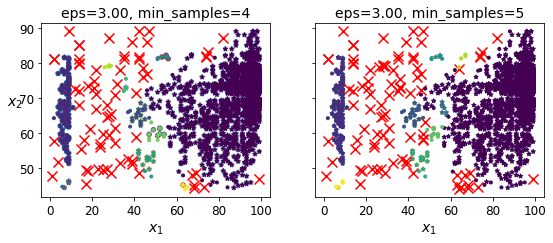

In [290]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=20)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=10, show_ylabels=False)


plt.show()

In [350]:
df=pd.read_csv('/Users/kevinc/Desktop/Data Science/F21DL Data Mining Machine Learning/F21SC CW/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [353]:

df=df[['Hepatitis B','Life expectancy ','Adult Mortality']].dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2937
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hepatitis B       2375 non-null   float64
 1   Life expectancy   2375 non-null   float64
 2   Adult Mortality   2375 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [356]:
X = df.iloc[:, [0, 1]].values
X

array([[65. , 65. ],
       [62. , 59.9],
       [64. , 59.9],
       ...,
       [73. , 44.8],
       [76. , 45.3],
       [79. , 46. ]])

In [362]:
y = df.iloc[:,2].values
y

array([263., 271., 268., ...,  73., 686., 665.])

In [366]:
from sklearn.mixture import GaussianMixture

n_range = range(2,11)

In [367]:
# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

In [368]:
for n in n_range:
    gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
    gm.fit(X)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(X))
    aic_score.append(gm.aic(X))

Text(0.5, 1.0, 'BIC and AIC Scores Per Number Of Clusters')

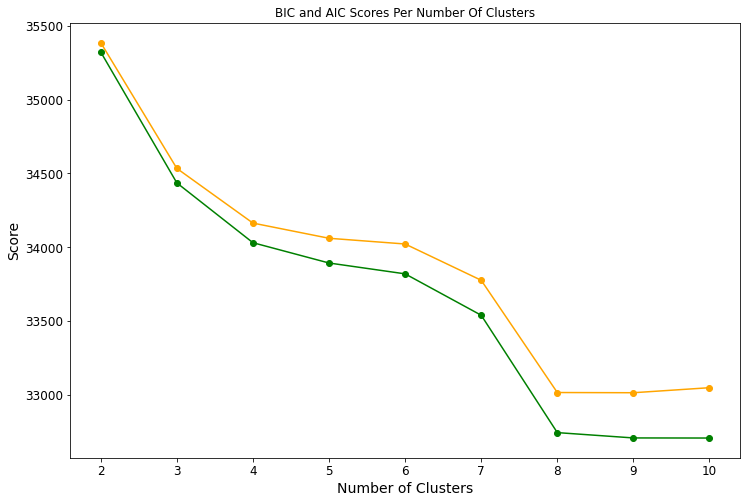

In [369]:
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('BIC and AIC Scores Per Number Of Clusters')

 BIC stands for Bayesian information criterion and AIC stands for Akaike information criterion

8 is the best number of cluster

In [372]:
from sklearn.mixture import BayesianGaussianMixture
import numpy as np
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

/Users/kevinc/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


array([0.45, 0.07, 0.08, 0.01, 0.  , 0.14, 0.16, 0.08, 0.  , 0.  ])

8 best number of cluster, return cluster weight, zero for eroneos cluster being weighted at zerp